<a href="https://colab.research.google.com/github/ravishankarramakrishnan/Deep_Learning_Practice/blob/master/0_ANN_Fashion_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Install Tensorflow 2.0
!pip install -q tensorflow==2.0.0-beta1

In [0]:
import tensorflow as tf


In [0]:
# Importing the Libraries

import numpy as np
import pandas as pd
import datetime
from tensorflow.keras.datasets import fashion_mnist

In [0]:
# Data Preprocessing

data = fashion_mnist.load_data()

In [0]:
(X_train, y_train), (X_test, y_test) = data

In [0]:
# Normalizing the Images - To make ANN Train Faster, get each pixel range between 0 and 1

X_train, X_test = X_train/255.0, X_test/255.0 # Value/Maximum

In [22]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [0]:
# Reshaping the Dataset - Set the Training/Test set to Vector format; Flatten 2D vector to 1D Vector
# [-1 (all elements), height * width]; -1 means All elements in X_train

X_train = X_train.reshape(-1, 28*28)

In [24]:
X_train.shape

(60000, 784)

In [0]:
# Reshape the Test Data

X_test = X_test.reshape(-1, 28*28)

In [26]:
X_test.shape

(10000, 784)

In [0]:
# Building the Model

# Define Model
model = tf.keras.models.Sequential()

# Add Fully Connected Hidden Layer
model.add(tf.keras.layers.Dense(units=128, activation='relu', input_shape = (784, ))) # Input Shape Needed only at First FC Layer

# Add Another Fully Connected Hidden Layer

model.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Add Second Layer with Dropout
model.add(tf.keras.layers.Dropout(0.2))

# Add output Layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [0]:
# Compile the Model

model.compile(optimizer= 'adam', loss= 'sparse_categorical_crossentropy', metrics= ['sparse_categorical_accuracy']) # Sparse Categorical Accuracy is used for Multiple Accuracy[Multiclass Classification]

In [29]:
# Check the Summary of Model

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [30]:
# Training the Model

model.fit(X_train, y_train, epochs= 10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 109us/sample - loss: 0.5122 - sparse_categorical_accuracy: 0.8164
Epoch 2/10
60000/60000 [==============================] - 7s 118us/sample - loss: 0.3817 - sparse_categorical_accuracy: 0.8613
Epoch 3/10
60000/60000 [==============================] - 6s 106us/sample - loss: 0.3418 - sparse_categorical_accuracy: 0.8742
Epoch 4/10
60000/60000 [==============================] - 6s 106us/sample - loss: 0.3177 - sparse_categorical_accuracy: 0.8817
Epoch 5/10
60000/60000 [==============================] - 6s 105us/sample - loss: 0.3039 - sparse_categorical_accuracy: 0.8872
Epoch 6/10
60000/60000 [==============================] - 6s 102us/sample - loss: 0.2906 - sparse_categorical_accuracy: 0.8923
Epoch 7/10
60000/60000 [==============================] - 6s 107us/sample - loss: 0.2772 - sparse_categorical_accuracy: 0.8955
Epoch 8/10
60000/60000 [==============================] - 6s 104us/sample - loss: 0.2683

In [33]:
# Evaluating the Model

model.evaluate(X_test, y_test)


10000/10000 [==============================] - 0s 46us/sample - loss: 0.3587 - sparse_categorical_accuracy: 0.8773


[0.35874830504655836, 0.8773]

In [0]:
# Plotting the Confusion Matrix

from sklearn.metrics import confusion_matrix
import numpy as np
import itertools


In [0]:
# Defining for Multiclass Confusion Matrix

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:np.newaxis]
        print('Normalised Confusion Matrix')
    else:
        print('Confusion Matrix without Normalisation')
    print(cm)

    # Plot
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    # Formatting text
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max()/2.

    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i,j], fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i,j] > thresh else 'black')
        
    plt.tight_layout()
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.show()


Confusion Matrix without Normalisation
[[846   0   7  13   1   1 129   0   3   0]
 [ 12 960   0  21   3   0   4   0   0   0]
 [ 22   0 702   9 115   0 152   0   0   0]
 [ 41   3  13 882  28   0  30   0   3   0]
 [  0   1  57  25 807   0 109   0   1   0]
 [  0   0   0   0   0 944   0  38   1  17]
 [125   0  52  16  48   0 756   0   3   0]
 [  0   0   0   0   0   7   0 971   0  22]
 [ 10   0   0   2   5   1  27   4 951   0]
 [  0   0   0   0   0   7   1  38   0 954]]


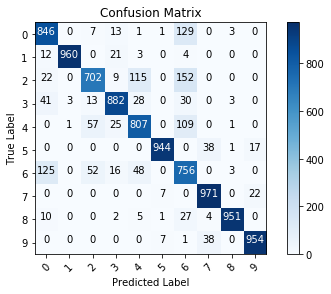

In [36]:
# Confusion Matrix Plot

y_pred = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, y_pred)

# Plot via Defined COnfusion Matrix

plot_confusion_matrix(cm, list(range(10)))


In [0]:
# Show Misclassified Example

misclass = np.where(y_pred != y_test)
